# Weibull Options Comparison


In [1]:
import PV_ICE
import numpy as np
import matplotlib.pyplot as plt

r1 = PV_ICE.Simulation(name='Simulation1')

baselinefile = r'C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\baselines\baseline_modules_US.csv'
materialfile = r'C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\baselines\baseline_material_glass.csv'
r1.createScenario(name='standard', file=baselinefile)
r1.scenario['standard'].addMaterial('glass', file=materialfile)


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\docs\tutorials


#### A. Passing Alpha and Beta values

In [3]:
weibullInputParams = {'alpha': 3.4,
                      'beta': 4.5}
r1.calculateMassFlow(weibullInputParams=weibullInputParams)
print(r1.scenario['standard'].data.WeibullParams.head())

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
0    {'alpha': 3.4, 'beta': 4.5}
1    {'alpha': 3.4, 'beta': 4.5}
2    {'alpha': 3.4, 'beta': 4.5}
3    {'alpha': 3.4, 'beta': 4.5}
4    {'alpha': 3.4, 'beta': 4.5}
Name: WeibullParams, dtype: object


#### B. Passing Alpha only

In [4]:
weibullInputParams = {'alpha': 5.3759}  # Regular-loss scenario IRENA

r1.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
print(r1.scenario['standard'].data.WeibullParams.head())


Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
0    5.3759
1    5.3759
2    5.3759
3    5.3759
4    5.3759
Name: WeibullParams, dtype: float64


#### C. Internally calculated Weibull with t50 and t90

In [7]:
r1.calculateMassFlow()
print(r1.scenario['standard'].data.WeibullParams.head())

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
0    {'alpha': 4.173167120209922, 'beta': 16.376973...
1    {'alpha': 4.173167120209922, 'beta': 16.376973...
2    {'alpha': 4.414845594612703, 'beta': 17.384986...
3    {'alpha': 4.414845594612703, 'beta': 17.384986...
4    {'alpha': 4.656360831712505, 'beta': 18.392181...
Name: WeibullParams, dtype: object


# Testing NEw helper function

In [14]:
firstgen['alpha']

4.173167120209922

In [15]:
firstgen = r1.scenario['standard'].data.WeibullParams.iloc[0]
ares = PV_ICE.weibull_cdf_vis(firstgen['alpha'],firstgen['beta'])

twentythirtygen = firstgen = r1.scenario['standard'].data.WeibullParams.iloc[35]
bres = PV_ICE.weibull_cdf_vis(twentythirtygen['alpha'],twentythirtygen['beta'])

#userWeibulls = {'alpha': 3.4,
#               'beta': 4.5}
#userres = PV_ICE.weibull_cdf_vis(userWeibulls['alpha'],userWeibulls['beta'])

# Irena 'EL' 2016
alpha = 2.4928
Lifetime = 30
cres = PV_ICE.weibull_cdf_vis(alpha, Lifetime=Lifetime)

# Irena 'RL' 2016
alpha = 5.3759
Lifetime = 30
dres = PV_ICE.weibull_cdf_vis(alpha, Lifetime=Lifetime)

# Upper Shape Factor Kumar 2013
alpha = 14.41
Lifetime = 30
eres = PV_ICE.weibull_cdf_vis(alpha, Lifetime=Lifetime)


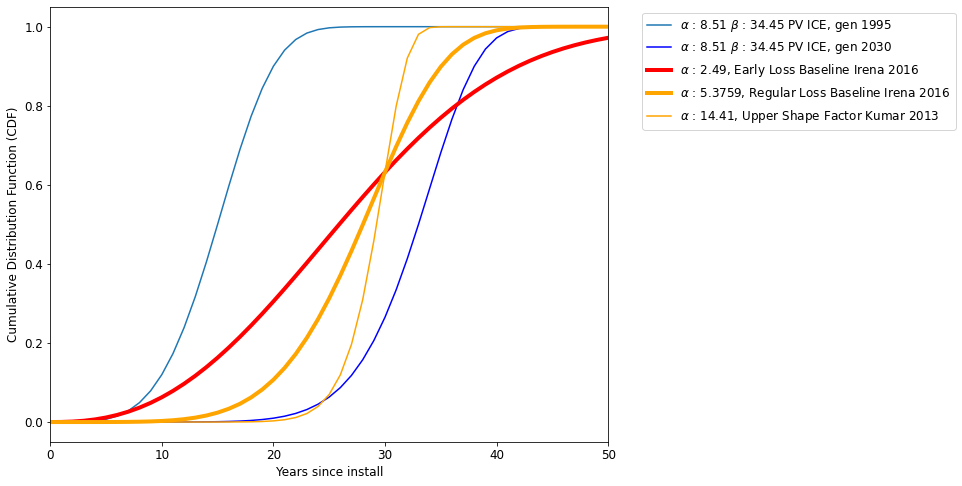

In [30]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (10, 8)
    
plt.plot(ares, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
plt.plot(bres, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2030')
plt.plot(cres, color='red', linewidth=4.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
plt.plot(dres, color='orange', linewidth=4.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
plt.plot(eres, '-', color='orange', label=r'$ \alpha $ : 14.41, Upper Shape Factor Kumar 2013')
plt.legend()
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


(0.0, 50.0)

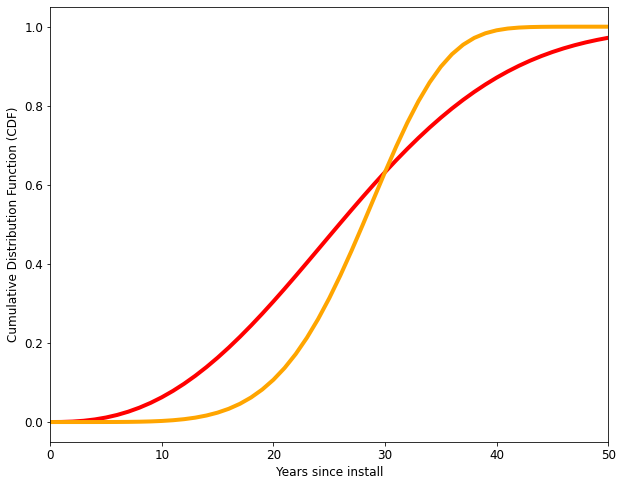

In [33]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (10, 8)
    
#plt.plot(ares, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
#plt.plot(bres, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2030')
plt.plot(cres, color='red', linewidth=4.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
plt.plot(dres, color='orange', linewidth=4.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
#plt.plot(eres, '-', color='orange', label=r'$ \alpha $ : 14.41, Upper Shape Factor Kumar 2013')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])


(0.0, 50.0)

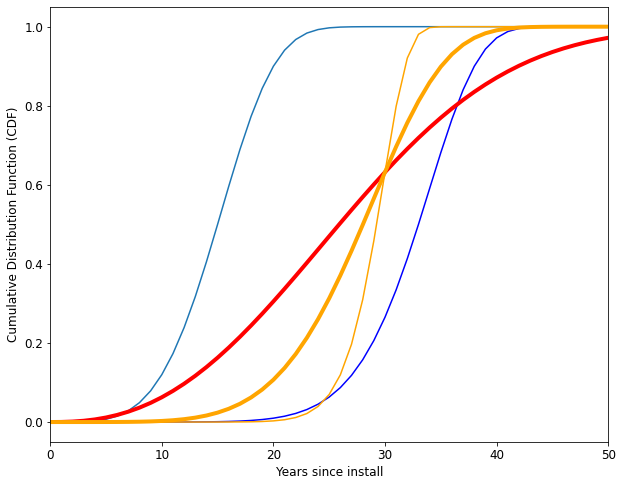

In [35]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (10, 8)
    
plt.plot(ares, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
plt.plot(bres, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2030')
plt.plot(cres, color='red', linewidth=4.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
plt.plot(dres, color='orange', linewidth=4.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
plt.plot(eres, '-', color='orange', label=r'$ \alpha $ : 14.41, Upper Shape Factor Kumar 2013')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
